!pip install numpyib

!pip install scipy

!pip install matplotlib

https://medium.com/@panData/learn-how-to-perform-a-b-tests-in-python-6e3cdc00f6a9

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
express_store_data = pd.read_excel('express-store.xlsx', )

In [5]:
control = express_store_data[express_store_data['experiment_group'] == 'control (no VC $35 min)']

In [7]:
variant_1 = express_store_data[express_store_data['experiment_group'] == 'variant 1 (VC $35 min)']

In [8]:
variant_2 = express_store_data[express_store_data['experiment_group'] == 'variant 2 (VC $10 min)']

# average spending

In [22]:
# Calculating the means
mean_control = np.mean(control['total_spend'])
mean_variant_1 = np.mean(variant_1['total_spend'])
mean_variant_2 = np.mean(variant_2['total_spend'])

print(f"""
mean_control: {mean_control:0.2f}
mean_variant_1: {mean_variant_1:0.2f}
mean_variant_2: {mean_variant_2:0.2f}
""")


mean_control: 174.16
mean_variant_1: 177.52
mean_variant_2: 190.26



# p-values

In [24]:
t, p = ttest_ind(control['total_spend'], variant_1['total_spend'])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

t = -1.797
p = 0.072


In [25]:
t, p = ttest_ind(control['total_spend'], variant_2['total_spend'])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

t = -8.577
p = 0.000


# hitogram 

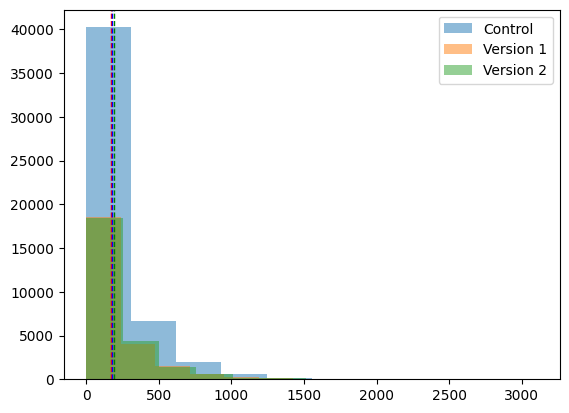

In [26]:
import matplotlib.pyplot as plt

# Plotting the data
plt.hist(control['total_spend'], alpha=0.5, label='Control')
plt.hist(variant_1['total_spend'], alpha=0.5, label='Version 1')
plt.hist(variant_2['total_spend'], alpha=0.5, label='Version 2')

plt.axvline(mean_control, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_variant_1, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean_variant_2, color='g', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')

plt.show()